In [1]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
import os

### Этап 1: Вырезаем номерной знак

In [100]:
import cv2 as cv
import numpy as np


img = cv.imread('cars\\01-715.jpg', cv.IMREAD_GRAYSCALE)
assert img is not None, "file could not be read, check with os.path.exists()"


img = cv.GaussianBlur(img, (3, 3), 0)

ret, thresh = cv.threshold(img,90,255,cv.THRESH_BINARY)

# thresh = cv.adaptiveThreshold(img, 255, cv.ADAPTIVE_THRESH_GAUSSIAN_C, cv.THRESH_BINARY, 15, 3)

# Поиск контуров
contours, _ = cv.findContours(thresh, cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)


img_color = cv.imread('cars\\01-715.jpg')
assert img_color is not None, "file could not be read, check with os.path.exists()"

# Фильтрация контуров по геометрическим признакам
possible_plate_contours = []
for cnt in contours:
    # Прямоугольник 
    rect = cv.minAreaRect(cnt)
    (x, y), (w, h), angle = rect
    
    
     # Проверка на нулевую высоту или ширину
    if h == 0 or w == 0:
        continue  # Пропускаем контур, если ширина или высота равны нулю
        
        
 
    aspect_ratio = w / h if w > h else h / w
    area = w * h
    
    # Параметры для фильтрации 
    if 2.5 < aspect_ratio < 4.7 and 1500 < area < 7150:
        possible_plate_contours.append(rect)
        


for rect in possible_plate_contours:
    # Получаем параметры
    (x, y), (w, h), angle = rect
    
    # Создаем бокс для отображения контура
    box = cv.boxPoints(rect)
    box = np.int0(box)
    cv.drawContours(img_color, [box], 0, (0, 255, 0), 2)
    
    # Вырезаем и поворачиваем ROI номерного знака
    M = cv.getRotationMatrix2D((x, y), angle, 1.0)
    rotated = cv.warpAffine(img_color, M, (img_color.shape[1], img_color.shape[0]))

    # Извлекаем ROI номерного знака
    roi = rotated[int(y - h):int(y + h), int(x - w):int(x + w)]

    
    cv.imshow('License Plate ROI', roi)
    cv.waitKey(0)

    
cv.imshow('Contours', img_color)
cv.waitKey(0)
cv.destroyAllWindows()

# cv.imwrite('01-541_roi.jpg', roi)

C:\Users\stoke\AppData\Local\Temp\ipykernel_13492\644706572.py:51: DeprecationWarning: `np.int0` is a deprecated alias for `np.intp`.  (Deprecated NumPy 1.24)
  box = np.int0(box)


## Этап 2 Вырезаем буквы

In [13]:


img = cv.imread('01-715_roi.jpg', cv.IMREAD_GRAYSCALE)
assert img is not None, "File could not be read, check with os.path.exists()"

# Список координат для каждого символа (x, y, ширина, высота)

coordinates = [
    (67, 16, 16, 26),   
    (82, 16, 17, 26),   
    (96, 16, 15, 26),
    (110, 16, 15, 26),
    (122, 16, 15, 26),
    (135, 16, 15, 26),
    (154, 16, 12, 26),
    (164, 16, 15, 26)
    
]
output_folder = 'fix_symbols'

# Вырезаем и отображаем каждый символ по указанным координатам
for i, (x, y, w, h) in enumerate(coordinates):
    symbol = img[y:y + h, x:x + w]
    cv.imshow(f' 715_ {i}', symbol)
    symbol_path = os.path.join(output_folder, f'715_{i}.png')
    cv.imwrite(symbol_path, symbol)
    cv.waitKey(0) 

cv.destroyAllWindows()


## Бинаризуем буквы

In [14]:

input_folder = 'symbols_let'  # Папка с исходными изображениями
output_folder = 'symbols_letB'  # Папка для сохранения бинаризованных изображений

os.makedirs(output_folder, exist_ok=True)

block_size = 11  # Размер соседней области (должен быть нечетным числом)
C = 2  # Константа, которая вычитается из вычисленного среднего

for filename in os.listdir(input_folder):
    file_path = os.path.join(input_folder, filename)

    if filename.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp', '.tiff')):
        
        img = cv.imread(file_path, cv.IMREAD_GRAYSCALE)

        if img is None:
            print(f"Не удалось загрузить файл {filename}. Пропуск...")
            continue

        
        adaptive_mean = cv.adaptiveThreshold(img, 255, cv.ADAPTIVE_THRESH_MEAN_C, 
                                             cv.THRESH_BINARY, block_size, C)

        output_path = os.path.join(output_folder, filename)
        cv.imwrite(output_path, adaptive_mean)
        print(f"Сохранено бинаризованное изображение: {output_path}")

print("Бинаризация завершена!")


Сохранено бинаризованное изображение: symbols_letB\393_0.png
Сохранено бинаризованное изображение: symbols_letB\393_4.png
Сохранено бинаризованное изображение: symbols_letB\393_5.png
Сохранено бинаризованное изображение: symbols_letB\541_0.png
Сохранено бинаризованное изображение: symbols_letB\541_4.png
Сохранено бинаризованное изображение: symbols_letB\541_5.png
Сохранено бинаризованное изображение: symbols_letB\715_0.png
Сохранено бинаризованное изображение: symbols_letB\715_4.png
Сохранено бинаризованное изображение: symbols_letB\715_5.png
Бинаризация завершена!


## Бинаризуем цифры

In [15]:
input_folder = 'symbols_reg_number'  # Папка с исходными изображениями
output_folder = 'symbols_reg_numberB'  # Папка для сохранения бинаризованных изображений

os.makedirs(output_folder, exist_ok=True)

block_size = 11  # Размер соседней области (должен быть нечетным числом)
C = 2  # Константа, которая вычитается из вычисленного среднего

for filename in os.listdir(input_folder):
    file_path = os.path.join(input_folder, filename)
    
    if filename.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp', '.tiff')):
        
        img = cv.imread(file_path, cv.IMREAD_GRAYSCALE)

        if img is None:
            print(f"Не удалось загрузить файл {filename}. Пропуск...")
            continue

        adaptive_mean = cv.adaptiveThreshold(img, 255, cv.ADAPTIVE_THRESH_MEAN_C, 
                                             cv.THRESH_BINARY, block_size, C)

        output_path = os.path.join(output_folder, filename)

        cv.imwrite(output_path, adaptive_mean)
        print(f"Сохранено бинаризованное изображение: {output_path}")

print("Бинаризация завершена!")

Сохранено бинаризованное изображение: symbols_reg_numberB\393_1.png
Сохранено бинаризованное изображение: symbols_reg_numberB\393_2.png
Сохранено бинаризованное изображение: symbols_reg_numberB\393_3.png
Сохранено бинаризованное изображение: symbols_reg_numberB\541_1.png
Сохранено бинаризованное изображение: symbols_reg_numberB\541_2.png
Сохранено бинаризованное изображение: symbols_reg_numberB\541_3.png
Сохранено бинаризованное изображение: symbols_reg_numberB\715_1.png
Сохранено бинаризованное изображение: symbols_reg_numberB\715_2.png
Сохранено бинаризованное изображение: symbols_reg_numberB\715_3.png
Бинаризация завершена!


### Этап 3.1 Сравниваем буквы с образцом

Символ 393_0.png наиболее похож на шаблон T.png с коэффициентом совпадения 0.56


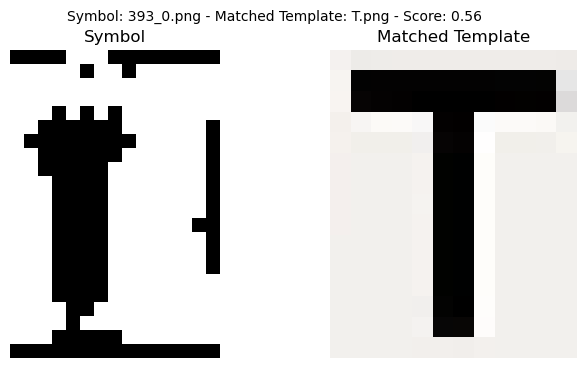

Символ 393_4.png наиболее похож на шаблон M.png с коэффициентом совпадения 0.58


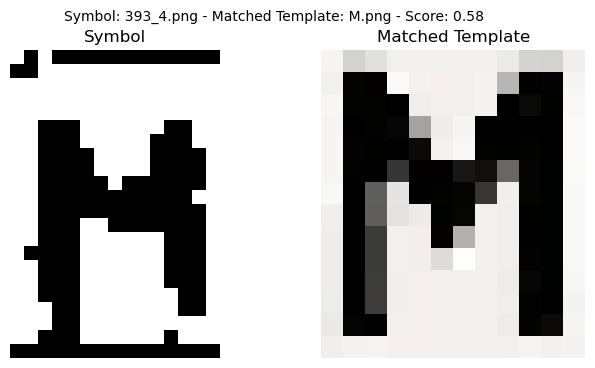

Символ 393_5.png наиболее похож на шаблон K.png с коэффициентом совпадения 0.76


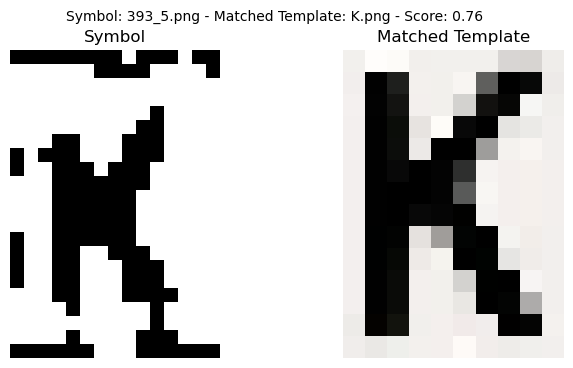

Символ 541_0.png наиболее похож на шаблон K.png с коэффициентом совпадения 0.54


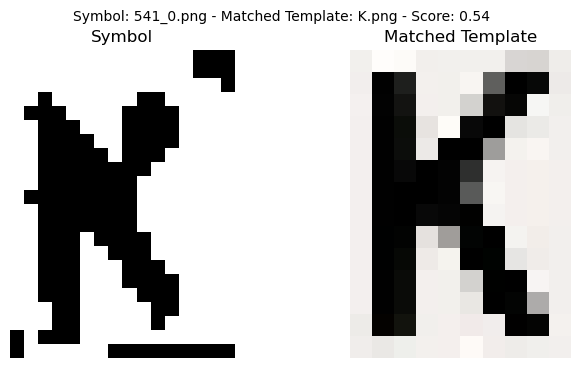

Символ 541_4.png наиболее похож на шаблон C.png с коэффициентом совпадения 0.51


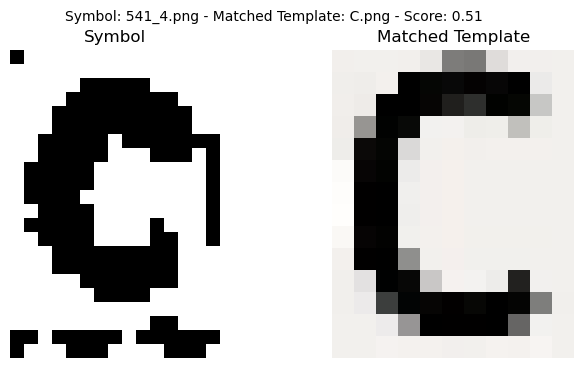

Символ 541_5.png наиболее похож на шаблон O.png с коэффициентом совпадения 0.58


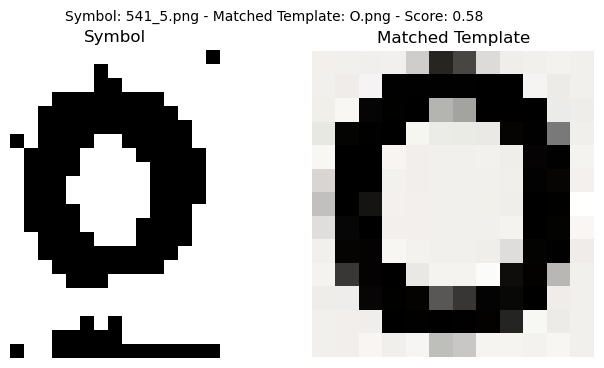

Символ 715_0.png наиболее похож на шаблон A.png с коэффициентом совпадения 0.62


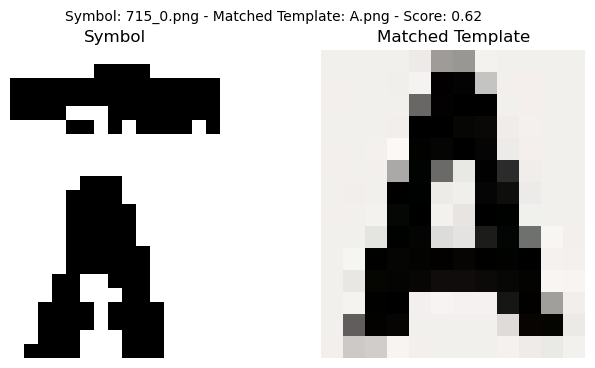

Символ 715_4.png наиболее похож на шаблон T.png с коэффициентом совпадения 0.37


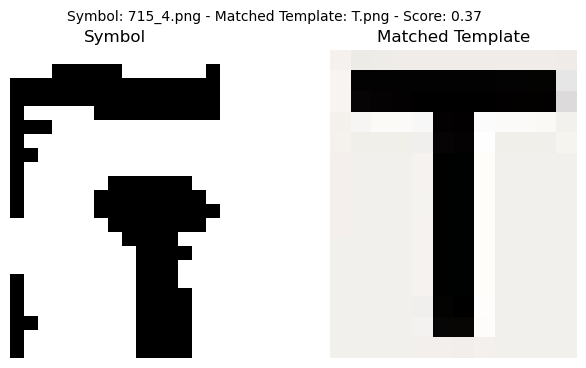

Символ 715_5.png наиболее похож на шаблон Y.png с коэффициентом совпадения 0.41


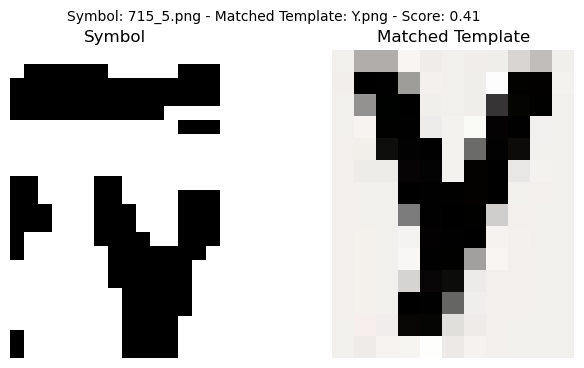

In [16]:

# Пути к папкам с символами и шаблонами
symbols_folder = 'symbols_letB'
letters_templates_folder = 'templates_letters'  # Шаблоны букв

# Метод сопоставления
matching_method = cv.TM_CCOEFF_NORMED

# Функция для сопоставления с конкретным набором шаблонов
def match_with_templates_letters(symbol_img, templates_folder):
    best_match = None
    highest_score = -1
    matched_template = None

    for template_filename in os.listdir(templates_folder):
        template_path = os.path.join(templates_folder, template_filename)
        template_img = cv.imread(template_path)

        if template_img is None:
            continue

        # Масштабирование шаблона
        scale_factor_template = 0.0599078341013825  # меняется в зависимости от типа символа
        new_width_template = int(template_img.shape[1] * scale_factor_template)
        new_height_template = int(template_img.shape[0] * scale_factor_template)
        template_resized = cv.resize(template_img, (new_width_template, new_height_template))

        # Сравнение символа с шаблоном
        result = cv.matchTemplate(symbol_img, template_resized, matching_method)
        _, max_val, _, _ = cv.minMaxLoc(result)

        # Нахождение лучшего совпадения
        if max_val > highest_score:
            highest_score = max_val
            best_match = template_filename
            matched_template = template_resized

    return best_match, highest_score, matched_template

# Цикл по всем вырезанным символам
for symbol_filename in os.listdir(symbols_folder):
    symbol_path = os.path.join(symbols_folder, symbol_filename)
    symbol_img = cv.imread(symbol_path)

    if symbol_img is None:
        continue       
        
    templates_folder = letters_templates_folder

    # Сопоставление с соответствующим набором шаблонов
    best_match, highest_score, matched_template = match_with_templates_letters(symbol_img, templates_folder)

    # Вывод результатов
    print(f"Символ {symbol_filename} наиболее похож на шаблон {best_match} с коэффициентом совпадения {highest_score:.2f}")

    # Визуализация символа и совпавшего шаблона
    if matched_template is not None:
        fig, axes = plt.subplots(1, 2, figsize=(8, 4))
        fig.suptitle(f'Symbol: {symbol_filename} - Matched Template: {best_match} - Score: {highest_score:.2f}', fontsize=10)

        # Исходный символ
        axes[0].imshow(symbol_img)
        axes[0].set_title('Symbol')
        axes[0].axis('off')

        # Совпавший шаблон
        axes[1].imshow(matched_template)
        axes[1].set_title('Matched Template')
        axes[1].axis('off')

        plt.show()


### Этап 3.2 сравниваем цифры с образцом

Символ 393_1.png наиболее похож на шаблон 8.png с коэффициентом совпадения 0.61


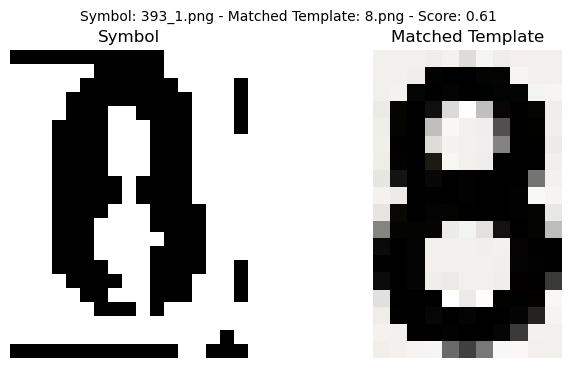

Символ 393_2.png наиболее похож на шаблон 2.png с коэффициентом совпадения 0.67


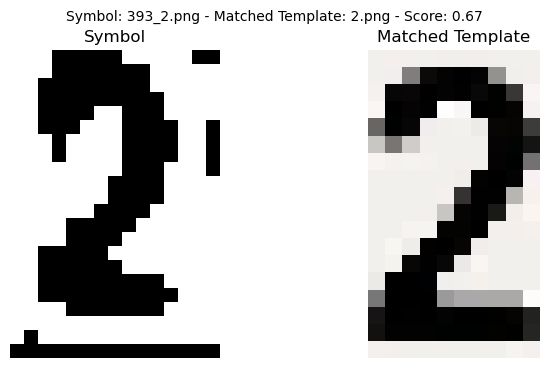

Символ 393_3.png наиболее похож на шаблон 9.png с коэффициентом совпадения 0.60


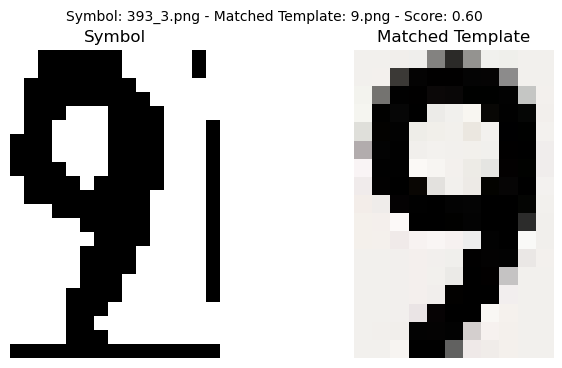

Символ 541_1.png наиболее похож на шаблон 2.png с коэффициентом совпадения 0.59


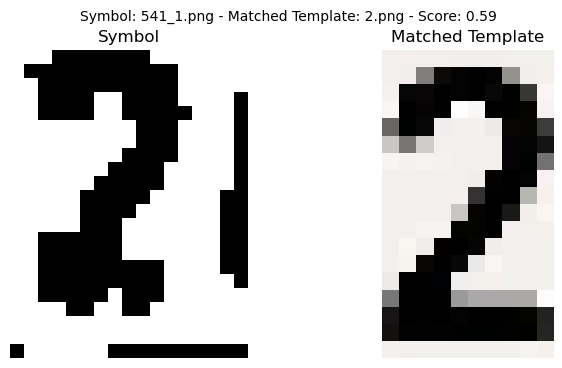

Символ 541_2.png наиболее похож на шаблон 6.png с коэффициентом совпадения 0.63


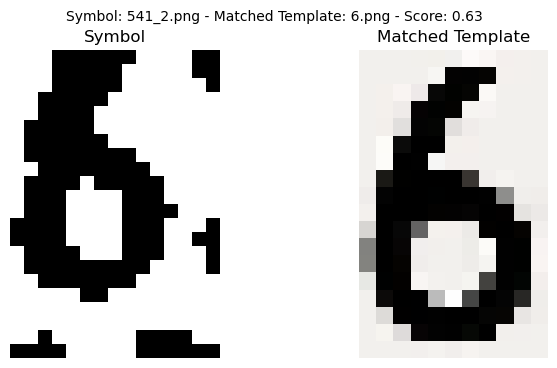

Символ 541_3.png наиболее похож на шаблон 3.png с коэффициентом совпадения 0.64


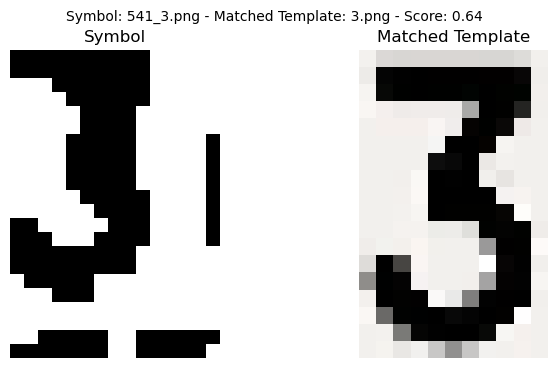

Символ 715_1.png наиболее похож на шаблон 7.png с коэффициентом совпадения 0.63


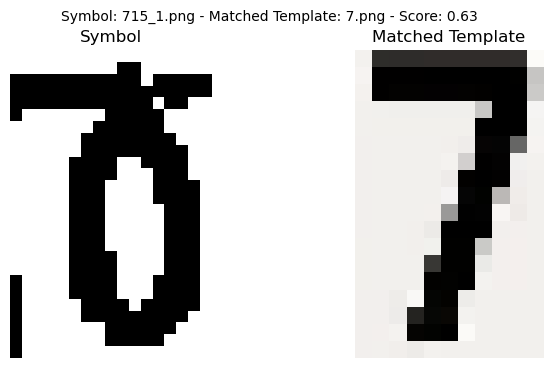

Символ 715_2.png наиболее похож на шаблон 2.png с коэффициентом совпадения 0.61


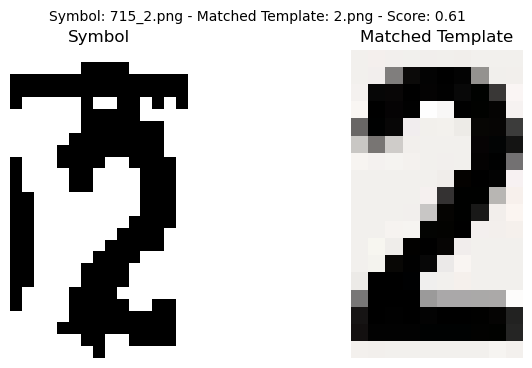

Символ 715_3.png наиболее похож на шаблон 3.png с коэффициентом совпадения 0.63


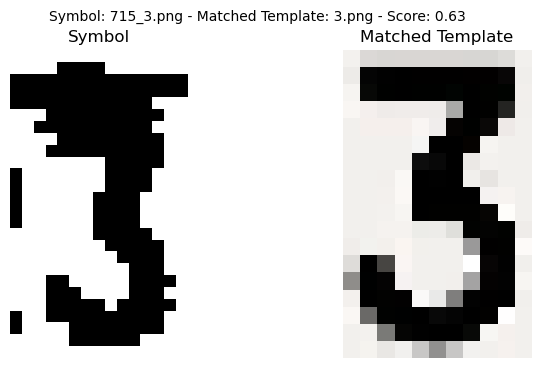

In [17]:

# Пути к папкам с символами и шаблонами
symbols_folder = 'symbols_reg_numberB'
digits_templates_folder = 'templates_digits'    # Шаблоны цифр

# Метод сопоставления
matching_method = cv.TM_CCOEFF_NORMED



# Функция для сопоставления с конкретным набором шаблонов
def match_with_templates_digits(symbol_img, templates_folder):
    best_match = None
    highest_score = -1
    matched_template = None

    for template_filename in os.listdir(templates_folder):
        template_path = os.path.join(templates_folder, template_filename)
        template_img = cv.imread(template_path)  #добавить GRAYSCALE ? 

        if template_img is None:
            continue

        # Масштабирование шаблона
        scale_factor_template = 0.0488505747126437  # меняется в зависимости от типа символа
        new_width_template = int(template_img.shape[1] * scale_factor_template)
        new_height_template = int(template_img.shape[0] * scale_factor_template)
        template_resized = cv.resize(template_img, (new_width_template, new_height_template))

        # Сравнение символа с шаблоном
        result = cv.matchTemplate(symbol_img, template_resized, matching_method)
        _, max_val, _, _ = cv.minMaxLoc(result)

        # Нахождение лучшего совпадения
        if max_val > highest_score:
            highest_score = max_val
            best_match = template_filename
            matched_template = template_resized

    return best_match, highest_score, matched_template

# Цикл по всем вырезанным символам
for symbol_filename in os.listdir(symbols_folder):
    symbol_path = os.path.join(symbols_folder, symbol_filename)
    symbol_img = cv.imread(symbol_path)  #добавить GRAYSCALE ? 

    if symbol_img is None:
        continue       
        
    templates_folder = digits_templates_folder

    # Сопоставление с соответствующим набором шаблонов
    best_match, highest_score, matched_template = match_with_templates_digits(symbol_img, templates_folder)

    # Вывод результатов
    print(f"Символ {symbol_filename} наиболее похож на шаблон {best_match} с коэффициентом совпадения {highest_score:.2f}")

    # Визуализация символа и совпавшего шаблона
    if matched_template is not None:
        fig, axes = plt.subplots(1, 2, figsize=(8, 4))
        fig.suptitle(f'Symbol: {symbol_filename} - Matched Template: {best_match} - Score: {highest_score:.2f}', fontsize=10)

        # Исходный символ
        axes[0].imshow(symbol_img)
        axes[0].set_title('Symbol')
        axes[0].axis('off')

        # Совпавший шаблон
        axes[1].imshow(matched_template)
        axes[1].set_title('Matched Template')
        axes[1].axis('off')

        plt.show()


## Бинаризация вырезанных символов

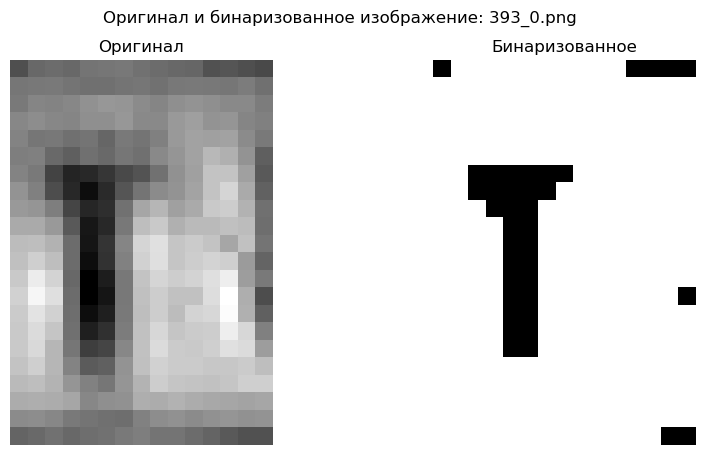

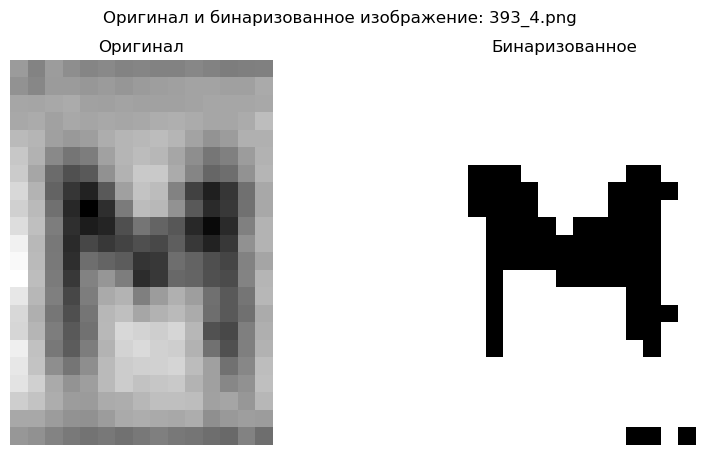

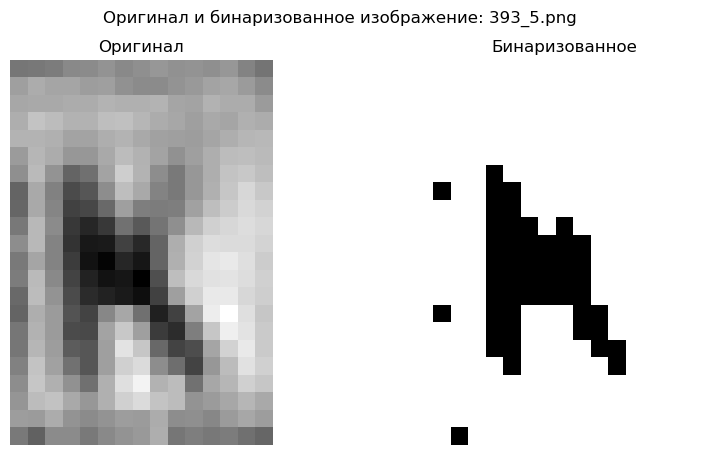

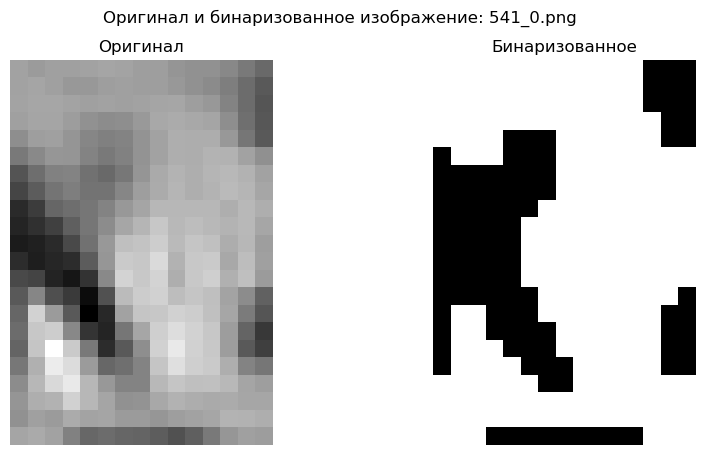

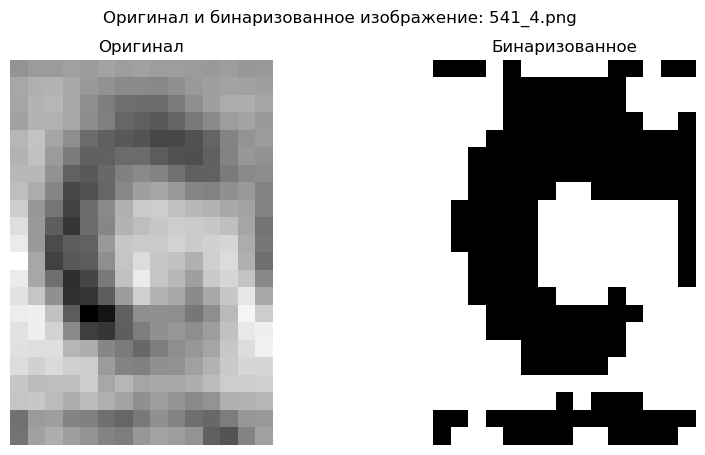

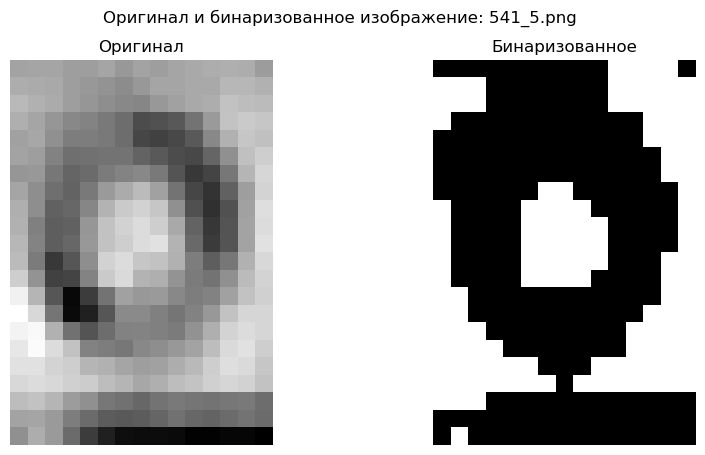

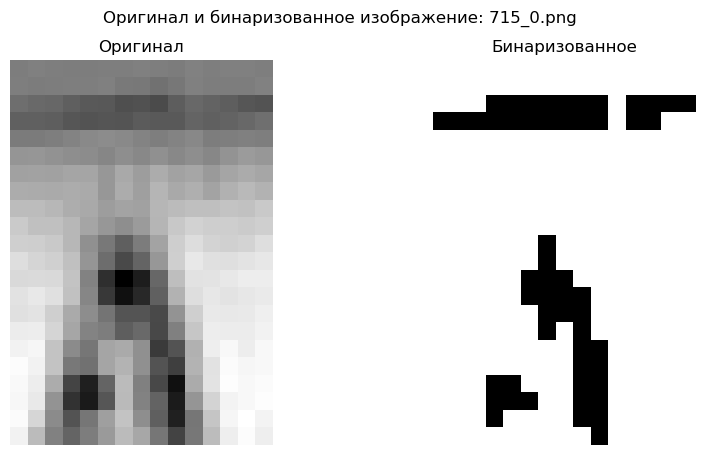

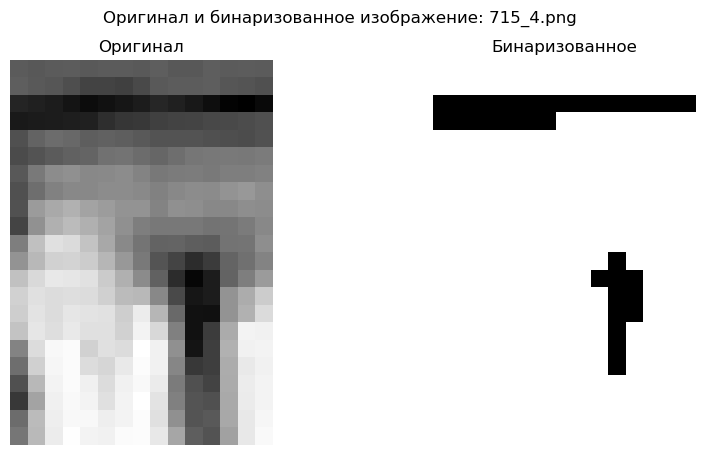

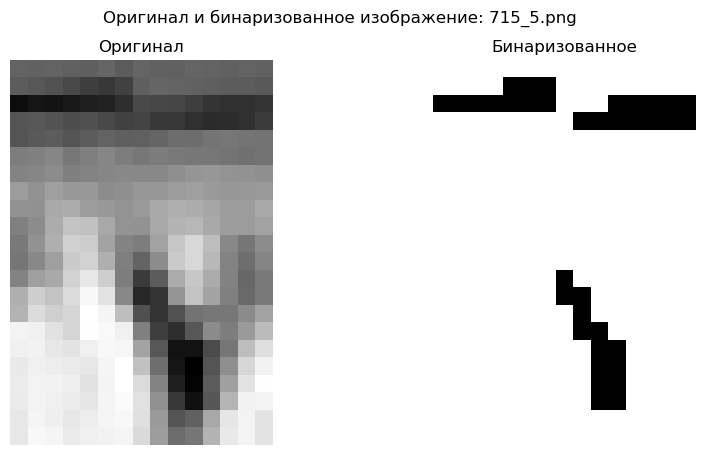

Вывод изображений завершён!


In [107]:
import cv2 as cv
import os
import matplotlib.pyplot as plt

# Указываем папку с исходными изображениями
input_folder = 'symbols_let'

# Пороговое значение для бинаризации
threshold_value = 128 # Можно настроить это значение

# Цикл по всем изображениям в папке
for filename in os.listdir(input_folder):
    file_path = os.path.join(input_folder, filename)

    # Проверяем, является ли файл изображением (например, по расширению)
    if filename.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp', '.tiff')):
        # Загружаем изображение
        img = cv.imread(file_path, cv.IMREAD_GRAYSCALE)

        # Проверяем, успешно ли загружено изображение
        if img is None:
            print(f"Не удалось загрузить файл {filename}. Пропуск...")
            continue

        # Применяем бинаризацию
        _, binary_img = cv.threshold(img, threshold_value, 255, cv.THRESH_BINARY)

        # Визуализация изображений
        fig, axes = plt.subplots(1, 2, figsize=(10, 5))
        fig.suptitle(f'Оригинал и бинаризованное изображение: {filename}', fontsize=12)

        # Оригинальное изображение
        axes[0].imshow(img, cmap='gray')
        axes[0].set_title('Оригинал')
        axes[0].axis('off')

        # Бинаризованное изображение
        axes[1].imshow(binary_img, cmap='gray')
        axes[1].set_title('Бинаризованное')
        axes[1].axis('off')

        # Отображение
        plt.show()

print("Вывод изображений завершён!")


### Адаптивная бинаризация 

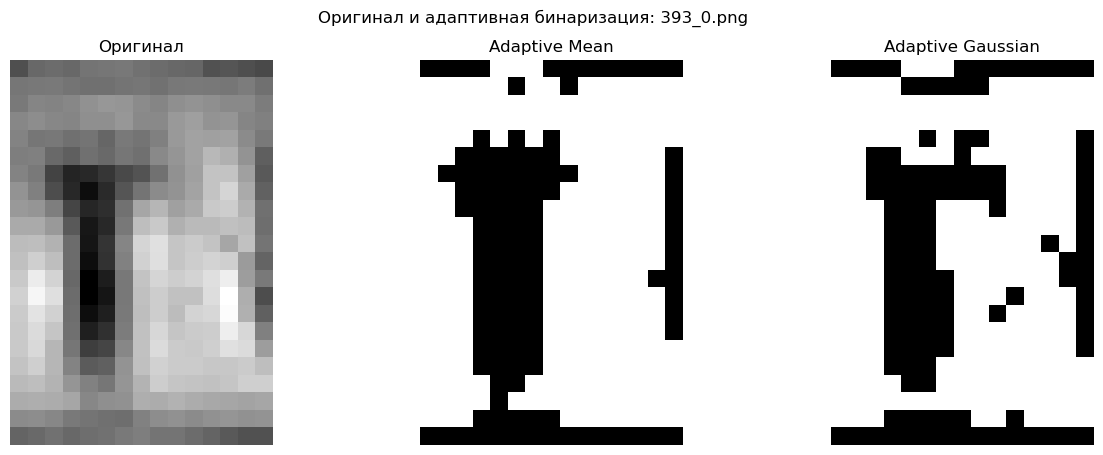

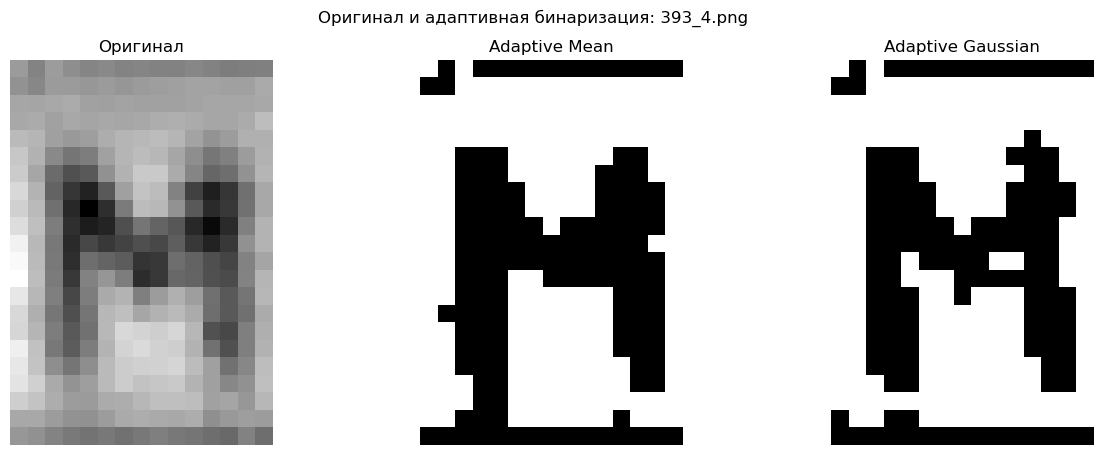

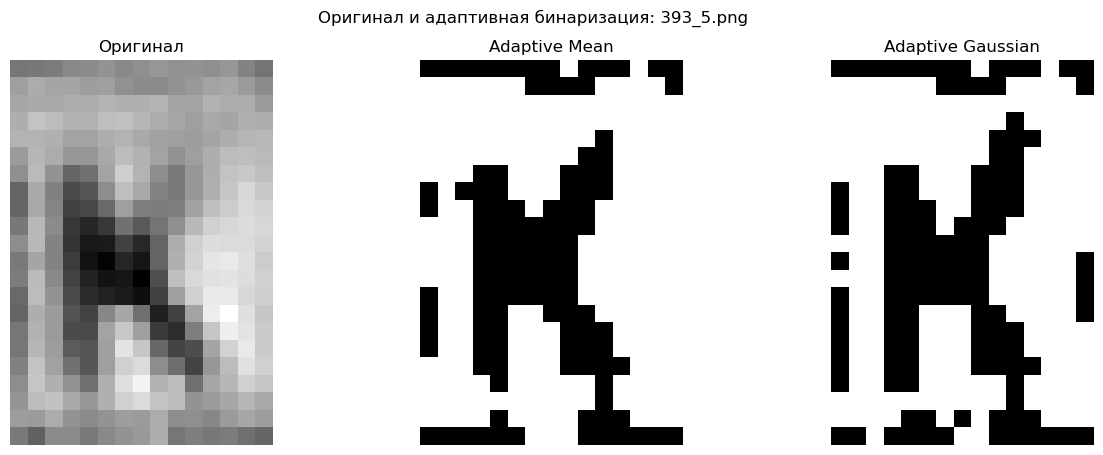

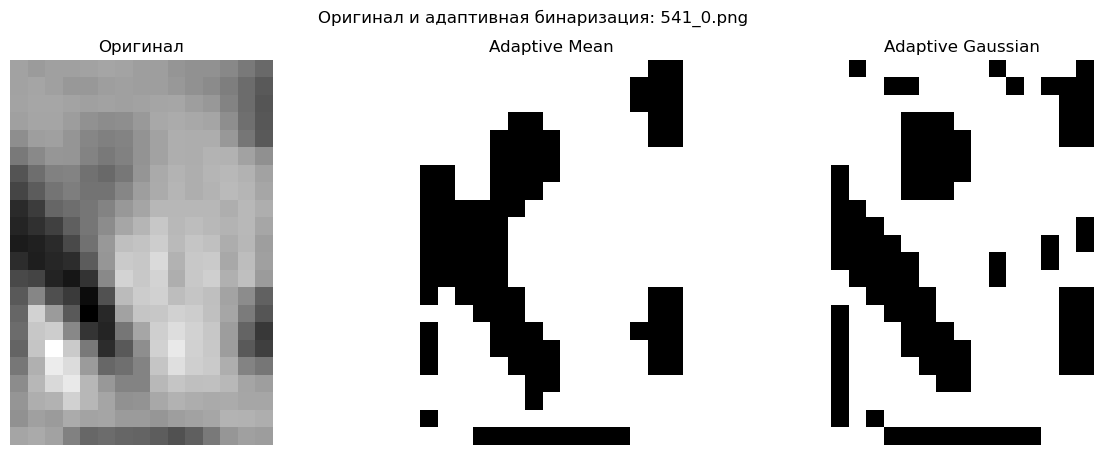

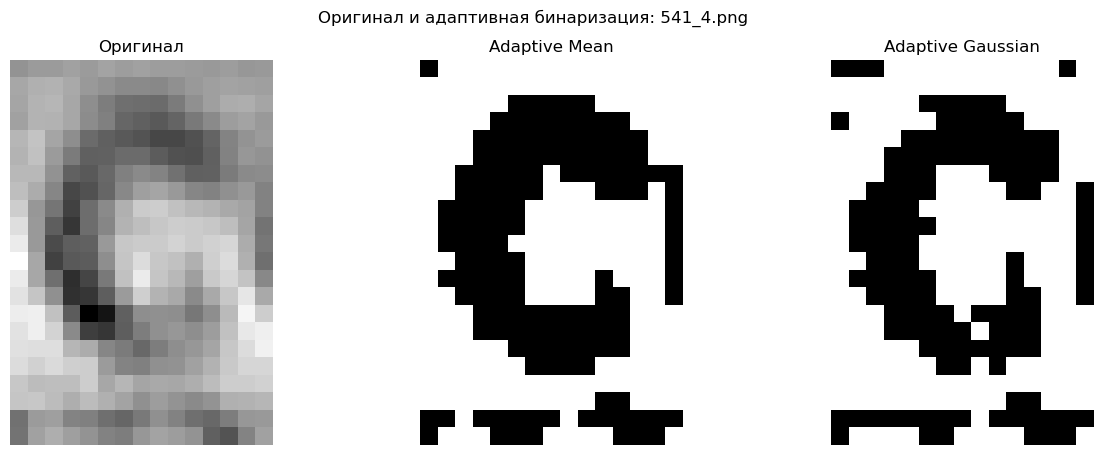

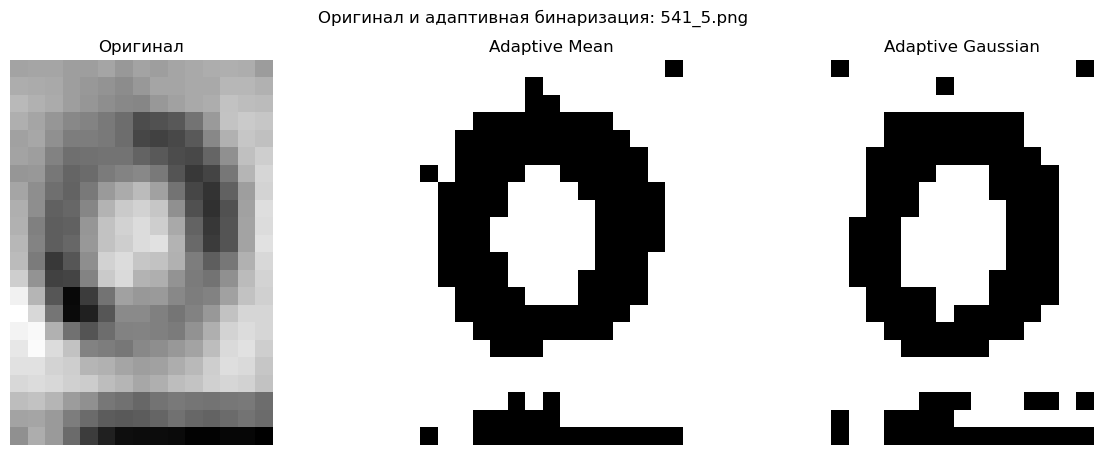

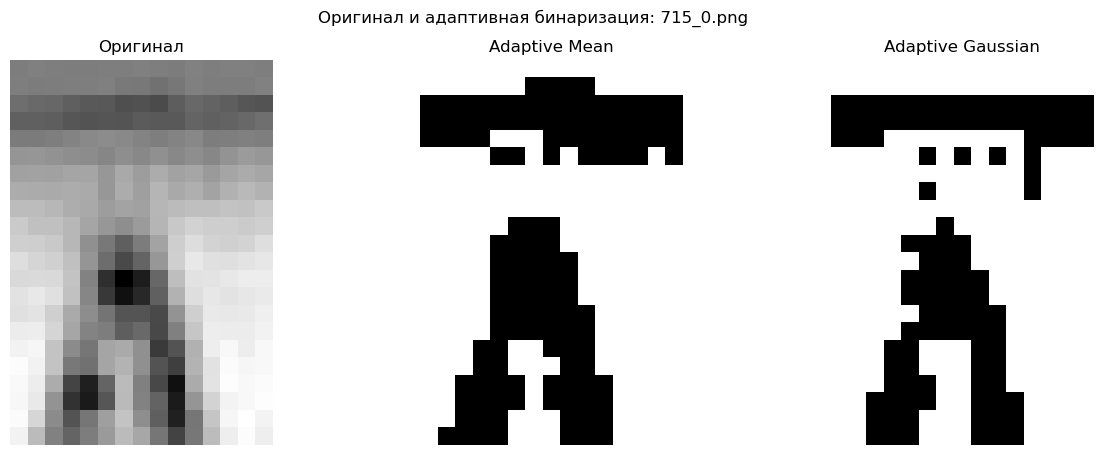

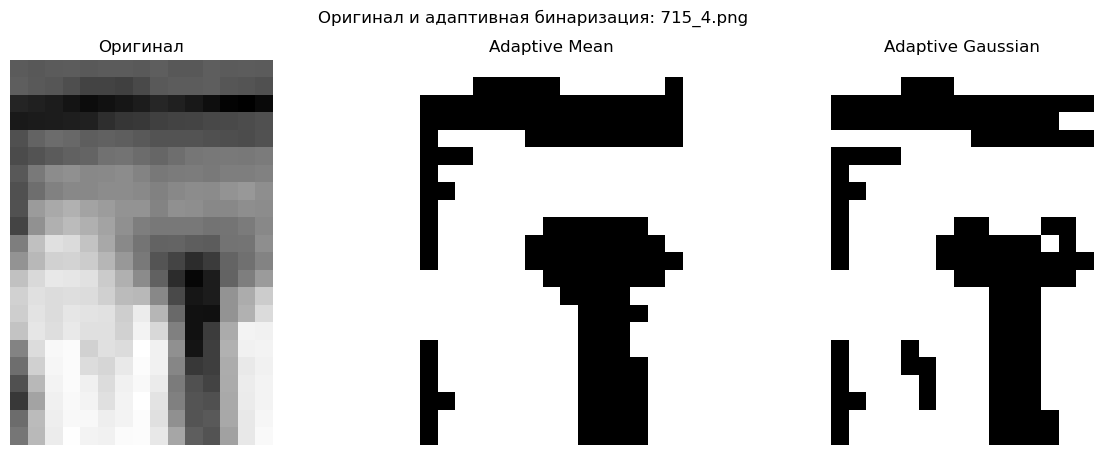

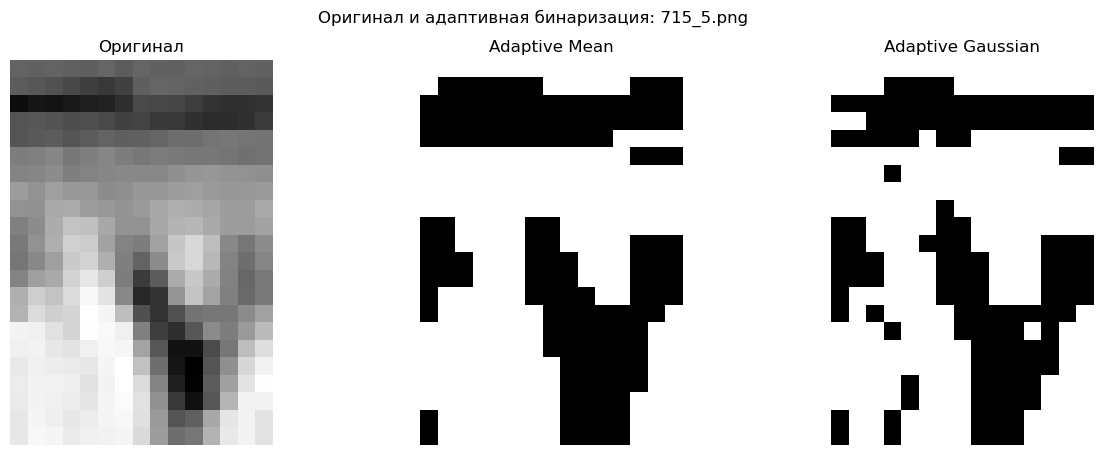

Адаптивная бинаризация завершена!


In [108]:
import cv2 as cv
import os
import matplotlib.pyplot as plt


input_folder = 'symbols_let'

# Параметры адаптивной бинаризации
block_size = 11  # Размер соседней области (должен быть нечетным числом)
C = 2  # Константа, которая вычитается из вычисленного среднего


for filename in os.listdir(input_folder):
    file_path = os.path.join(input_folder, filename)

    if filename.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp', '.tiff')):
        img = cv.imread(file_path, cv.IMREAD_GRAYSCALE)

        if img is None:
            print(f"Не удалось загрузить файл {filename}. Пропуск...")
            continue

        # Адаптивная бинаризация с использованием среднего и гаусса
        adaptive_mean = cv.adaptiveThreshold(img, 255, cv.ADAPTIVE_THRESH_MEAN_C, 
                                             cv.THRESH_BINARY, block_size, C)
        adaptive_gaussian = cv.adaptiveThreshold(img, 255, cv.ADAPTIVE_THRESH_GAUSSIAN_C, 
                                                 cv.THRESH_BINARY, block_size, C)

      
        fig, axes = plt.subplots(1, 3, figsize=(15, 5))
        fig.suptitle(f'Оригинал и адаптивная бинаризация: {filename}', fontsize=12)

        # Оригинальное изображение
        axes[0].imshow(img, cmap='gray')
        axes[0].set_title('Оригинал')
        axes[0].axis('off')

        # Адаптивная бинаризация (Mean)
        axes[1].imshow(adaptive_mean, cmap='gray')
        axes[1].set_title('Adaptive Mean')
        axes[1].axis('off')

        # Адаптивная бинаризация (Gaussian)
        axes[2].imshow(adaptive_gaussian, cmap='gray')
        axes[2].set_title('Adaptive Gaussian')
        axes[2].axis('off')

        plt.show()

print("Адаптивная бинаризация завершена!")
